-CRIM: Per capita crime rate by town. It indicates the level of crime in the area.

-ZN: Proportion of residential land zoned for lots over 25,000 sq.ft. This feature reflects the area's residential density.

-INDUS: Proportion of non-retail business acres per town. This is an indicator of the commercial use of land away from residential areas.

-CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise). This indicates whether the property is near the Charles River, which may add to the aesthetic value of the neighborhood.

-NOX: Nitric oxides concentration (parts per 10 million). It represents the level of industrial pollutants in the area.

-RM: Average number of rooms per dwelling. More rooms typically indicate more spacious accommodation.

-AGE: Proportion of owner-occupied units built prior to 1940. Older structures might lack newer amenities or could be considered more prestigious depending on the architecture and condition.

-DIS: Weighted distances to five Boston employment centres. This feature measures the accessibility to workplaces, which can influence housing prices.

-RAD: Index of accessibility to radial highways. Higher values indicate easier access to major roadways.

-TAX: Full-value property-tax rate per $10,000. This reflects the annual property tax rate.

-PTRATIO: Pupil-teacher ratio by town. Lower values typically indicate better educational facilities, which is a significant factor for families when choosing a home.

-B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town.

-LSTAT: Percentage of lower status of the population.

-MEDV: Median value of owner-occupied homes in $1000s

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
boston_data = pd.read_csv('HousingData.csv')

In [58]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [59]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Handling missing data

In [60]:
boston_data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

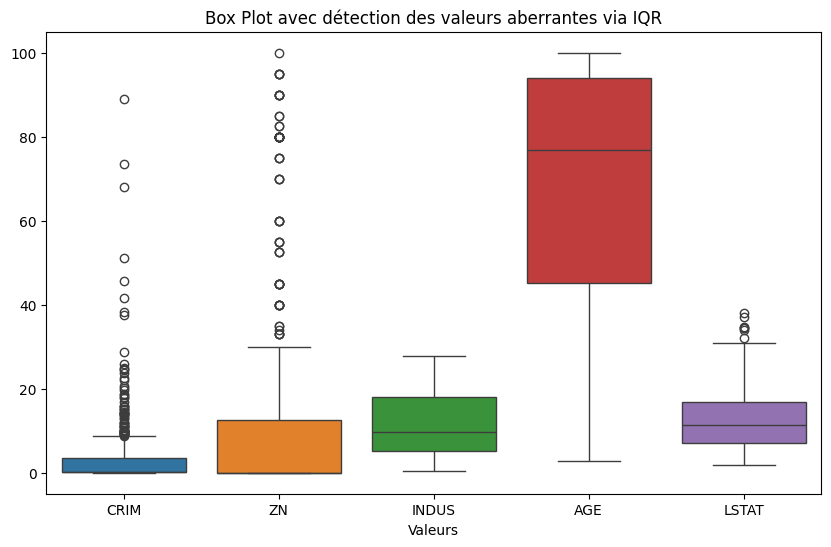

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
columns_with_na = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']
sns.boxplot(data=boston_data[columns_with_na])
plt.title("Box Plot avec détection des valeurs aberrantes via IQR")
plt.xlabel("Valeurs")
plt.show()

In [62]:
# Loop over columns with missing values and calculate skewness

for col in columns_with_na:
    skewness = boston_data[col].skew()
    print(f"Skewness of {col}: {skewness}")


Skewness of CRIM: 5.2128426499800975
Skewness of ZN: 2.2566126051408197
Skewness of INDUS: 0.30372218758107833
Skewness of AGE: -0.5824700575056604
Skewness of LSTAT: 0.908891836957813


In [63]:
from sklearn.impute import SimpleImputer

# Impute CRIM, ZN, and LSTAT using median (or you could try KNN imputation)
median_imputer = SimpleImputer(strategy='median')
boston_data[['CRIM', 'ZN', 'LSTAT']] = median_imputer.fit_transform(boston_data[['CRIM', 'ZN', 'LSTAT']])

# Impute INDUS and AGE using mean
mean_imputer = SimpleImputer(strategy='mean')
boston_data[['INDUS', 'AGE']] = mean_imputer.fit_transform(boston_data[['INDUS', 'AGE']])


In [64]:
from sklearn.impute import SimpleImputer

# Mode Imputation for the categorical column
mode_imputer = SimpleImputer(strategy='most_frequent')
boston_data[['CHAS']] = mode_imputer.fit_transform(boston_data[['CHAS']])

boston_data.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Handling outliers

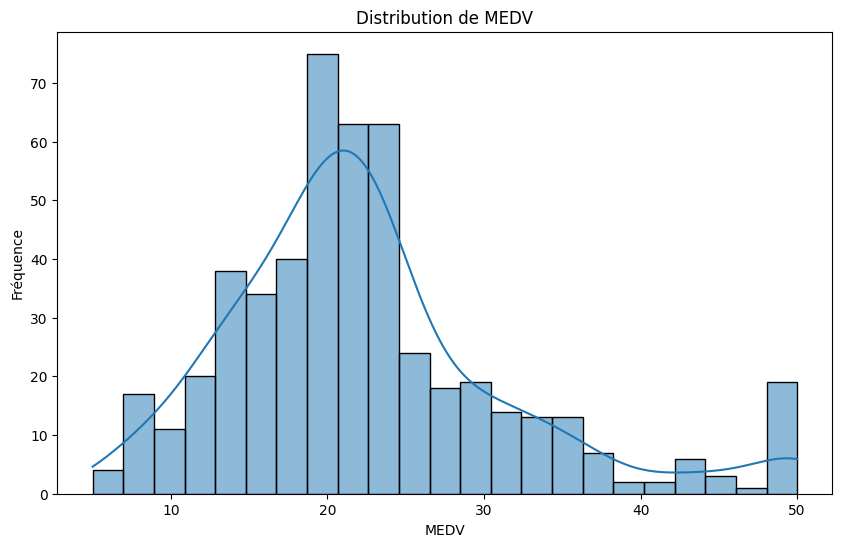

Skewness de MEDV : 1.1080984082549072
Test de Shapiro-Wilk : Statistique = 0.9171758803890093, p-value = 4.941386258635722e-16


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# 1. Visualiser la distribution de MEDV
plt.figure(figsize=(10, 6))
sns.histplot(boston_data['MEDV'], kde=True)
plt.title("Distribution de MEDV")
plt.xlabel("MEDV")
plt.ylabel("Fréquence")
plt.show()

# 2. Vérifier la skewness de MEDV
skewness = boston_data['MEDV'].skew()
print(f"Skewness de MEDV : {skewness}")

# 3. Tester la normalité avec le test de Shapiro-Wilk (si nécessaire)
stat, p_value = stats.shapiro(boston_data['MEDV'].dropna())
print(f"Test de Shapiro-Wilk : Statistique = {stat}, p-value = {p_value}")



The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one

Paramètre lambda de Box-Cox : 0.21662091178859486


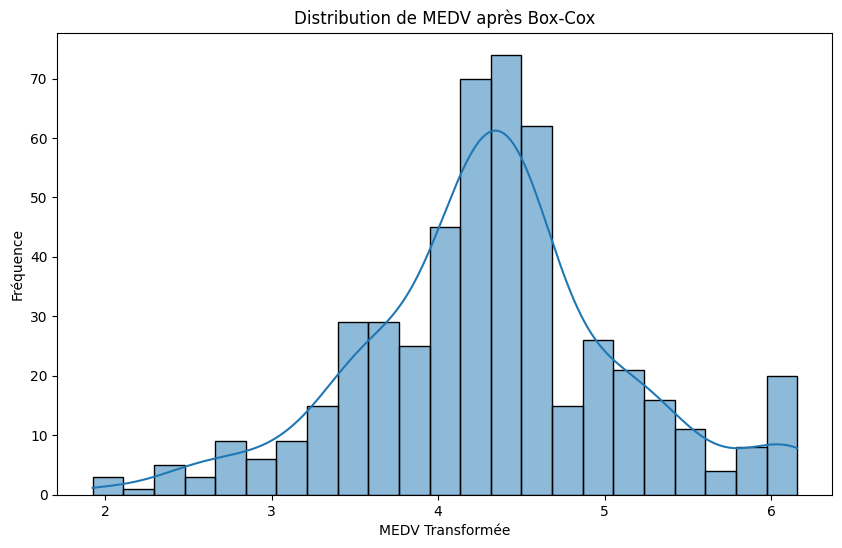

In [66]:
# 4. Appliquer Box-Cox si nécessaire (seulement si la skewness est élevée)
if abs(skewness) > 0.5:  # Critère de skewness élevé, ajustez au besoin
    # Box-Cox nécessite que les données soient strictement positives
    if (boston_data['MEDV'] <= 0).any():
        print("Box-Cox ne peut pas être appliqué car la variable contient des valeurs négatives ou nulles.")
    else:
        # Appliquer Box-Cox
        transformed_data, lambda_param = stats.boxcox(boston_data['MEDV'])
        print(f"Paramètre lambda de Box-Cox : {lambda_param}")
        
        # Afficher la distribution après transformation
        plt.figure(figsize=(10, 6))
        sns.histplot(transformed_data, kde=True)
        plt.title("Distribution de MEDV après Box-Cox")
        plt.xlabel("MEDV Transformée")
        plt.ylabel("Fréquence")
        plt.show()
        
        # Remplacer MEDV par la version transformée dans les données
        boston_data['MEDV'] = transformed_data

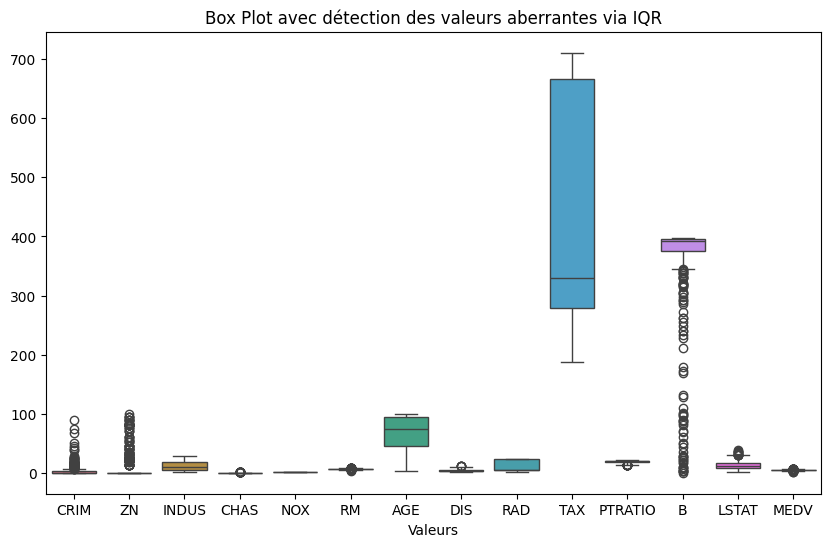

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=boston_data)
plt.title("Box Plot avec détection des valeurs aberrantes via IQR")
plt.xlabel("Valeurs")
plt.show()

In [68]:
# Loop over each column in the dataset to handle outliers
for col in boston_data.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = boston_data[col].quantile(0.25)
    Q3 = boston_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the bounds
    boston_data[col] = boston_data[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Verify the changes by checking summary statistics
boston_data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.0,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.810211,0.0,11.083992,0.0,0.554695,6.275312,68.518519,3.783947,9.549407,408.237154,18.463834,381.918836,12.603340,4.322075
std,2.623892,0.0,6.699165,0.0,0.115878,0.630242,27.439466,2.069765,8.707259,168.537116,2.143924,19.054913,6.835809,0.718332
min,0.006320,0.0,0.460000,0.0,0.385000,4.778500,2.900000,1.129600,1.000000,187.000000,13.200000,344.106250,1.730000,2.803718
25%,0.083235,0.0,5.190000,0.0,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,3.914221
50%,0.253715,0.0,9.900000,0.0,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,4.329286
75%,2.808720,0.0,18.100000,0.0,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,4.654557
max,6.896948,0.0,27.740000,0.0,0.871000,7.730500,100.000000,9.820800,24.000000,711.000000,22.000000,396.900000,30.580000,5.765060


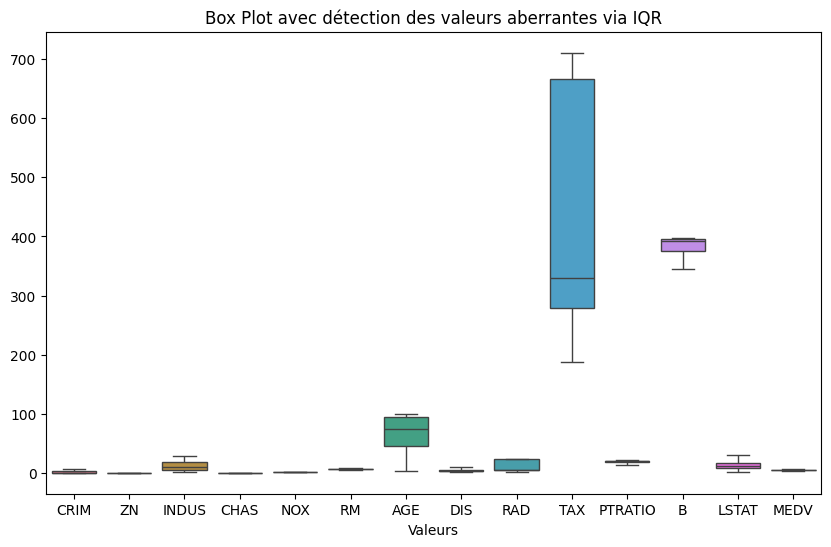

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=boston_data)
plt.title("Box Plot avec détection des valeurs aberrantes via IQR")
plt.xlabel("Valeurs")
plt.show()

## feature selection

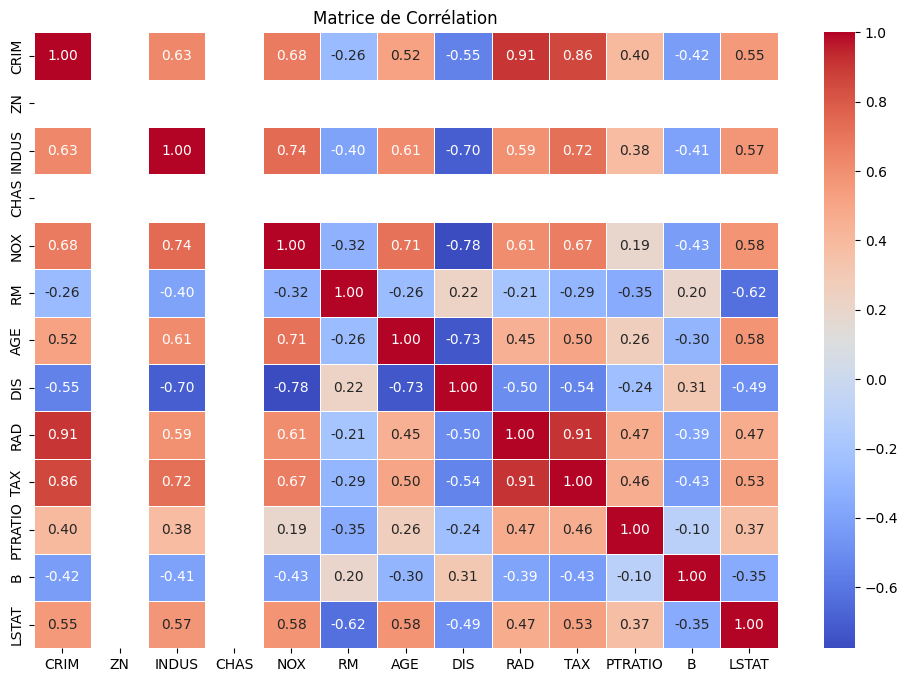

In [70]:
# Calculer la matrice de corrélation
correlation_matrix = boston_data.drop('MEDV', axis=1).corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [71]:
# Corrélation avec la cible 'MEDV'
correlation_with_target = correlation_matrix['MEDV'].sort_values(ascending=False)
print(correlation_with_target)


KeyError: 'MEDV'

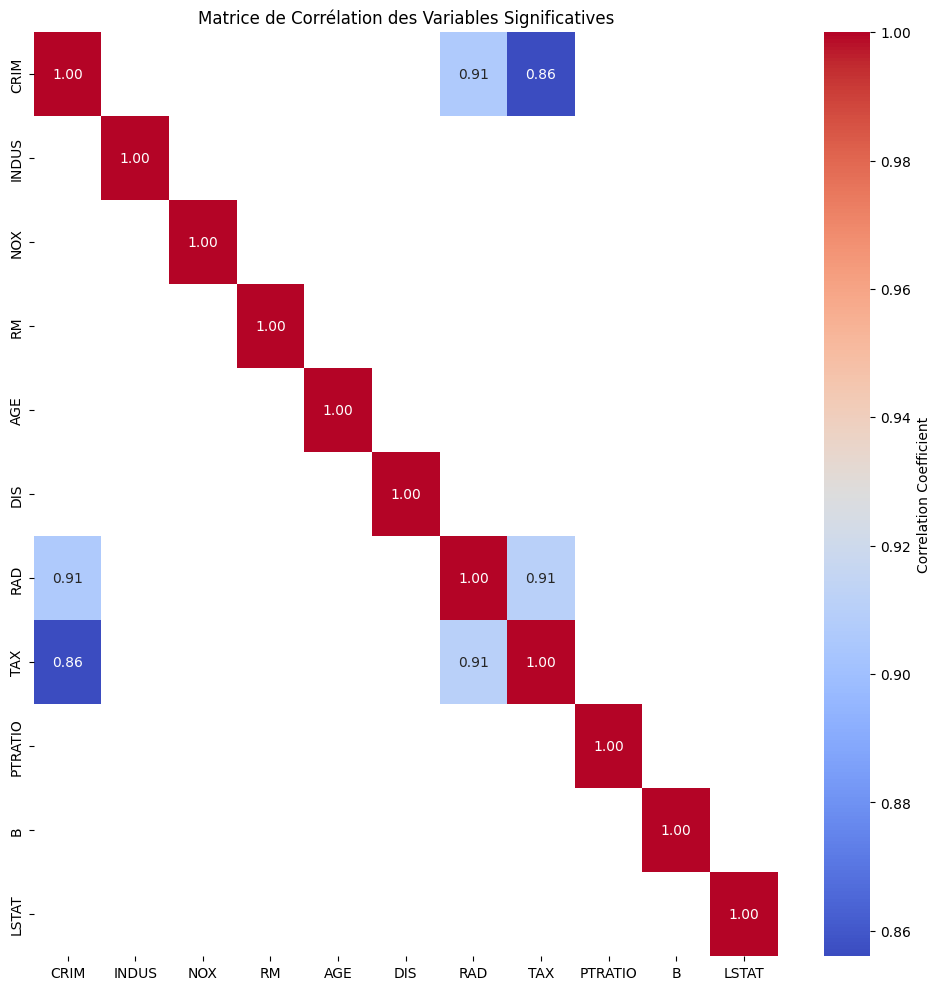

In [72]:

# Identifier les variables significatives (par exemple, avec un seuil de 0.7)
threshold = 0.8
significant_correlations = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

significant_correlations_cleaned = significant_correlations.dropna(how='all').dropna(axis=1, how='all')


# Visualisation avec un heatmap pour les corrélations significatives
plt.figure(figsize=(12, 12))
sns.heatmap(significant_correlations_cleaned, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Matrice de Corrélation des Variables Significatives")
plt.show()

In [73]:
import pandas as pd

# Calculer la matrice de corrélation
correlation_matrix = boston_data.corr()

# Définir un seuil de corrélation élevé (par exemple, 0.8)
high_corr_threshold = 0.8

# Initialiser une liste pour stocker les colonnes à supprimer
to_drop = set()

# Parcourir chaque paire de variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            
            # Vérifier la corrélation de chaque variable avec MEDV
            if abs(correlation_matrix['MEDV'][col1]) >= abs(correlation_matrix['MEDV'][col2]):
                to_drop.add(col2)
            else:
                to_drop.add(col1)

# Supprimer les variables identifiées
new_boston_data = boston_data.drop(columns=to_drop)

# Afficher les variables supprimées
print("Variables supprimées en raison de la colinéarité :", to_drop)


Variables supprimées en raison de la colinéarité : {'CRIM', 'RAD'}


In [74]:
new_boston_data.head()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,4.572936
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,4.365582
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,5.336943
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,5.254955
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222,18.7,396.90,11.43,5.428607


## Standardization des variables

In [76]:
from sklearn.model_selection import train_test_split

# Séparer les variables explicatives et la cible
X = new_boston_data.drop(columns=['MEDV'])
y = new_boston_data['MEDV']

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
from sklearn.preprocessing import StandardScaler

# Initialiser le standard scaler
scaler = StandardScaler()

# Standardiser les données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Entrainement du modèle

### Trouver les meilleurs hyperparametres pour Ridge, Lasso et ElasticNet

In [78]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres pour alpha
param_grid = {'alpha': [0.01, 0.1, 1.0, 1.5, 2, 10.0, 100.0]}

# Rechercher le meilleur alpha pour Ridge
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']
print("Meilleur alpha pour Ridge:", best_alpha_ridge)

# Rechercher le meilleur alpha pour Lasso
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_cv.best_params_['alpha']
print("Meilleur alpha pour Lasso:", best_alpha_lasso)

Meilleur alpha pour Ridge: 10.0
Meilleur alpha pour Lasso: 0.01


In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres pour ElasticNet
param_grid_enet = {
    'alpha': [0.01, 0.1, 1.0, 1.5, 2, 10.0, 100.0],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # 1.0 correspond à Lasso pur, 0.0 à Ridge pur
}

# Rechercher le meilleur ensemble de paramètres pour ElasticNet
enet_cv = GridSearchCV(ElasticNet(), param_grid_enet, cv=5, scoring='neg_mean_squared_error')
enet_cv.fit(X_train_scaled, y_train)

# Meilleurs paramètres pour ElasticNet
best_alpha_enet = enet_cv.best_params_['alpha']
best_l1_ratio_enet = enet_cv.best_params_['l1_ratio']
print("Meilleur alpha pour ElasticNet:", best_alpha_enet)
print("Meilleur l1_ratio pour ElasticNet:", best_l1_ratio_enet)


Meilleur alpha pour ElasticNet: 0.01
Meilleur l1_ratio pour ElasticNet: 0.1


In [80]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Initialiser les modèles avec les meilleurs hyperparamètres
linear_model = LinearRegression()
ridge_model = Ridge(alpha=best_alpha_ridge)
lasso_model = Lasso(alpha=best_alpha_lasso)
enet_model = ElasticNet(alpha=best_alpha_enet, l1_ratio=best_l1_ratio_enet)

# Entraîner les modèles sur l'ensemble d'entraînement
linear_model.fit(X_train_scaled, y_train)
ridge_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
enet_model.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_enet = enet_model.predict(X_test_scaled)

# Évaluer les performances des modèles
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_enet = mean_squared_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)

# Afficher les résultats de chaque modèle
print(f"Linear Regression - MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}")
print(f"Ridge Regression - MSE: {mse_ridge:.2f}, R^2: {r2_ridge:.2f}")
print(f"Lasso Regression - MSE: {mse_lasso:.2f}, R^2: {r2_lasso:.2f}")
print(f"ElasticNet Regression - MSE: {mse_enet:.2f}, R^2: {r2_enet:.2f}")

Linear Regression - MSE: 0.12, R^2: 0.74
Ridge Regression - MSE: 0.12, R^2: 0.74
Lasso Regression - MSE: 0.12, R^2: 0.74
ElasticNet Regression - MSE: 0.12, R^2: 0.74


Puisque tous les modèles ont les memes metrics, on choisit le modèle le moins complexe: LinearRegression

In [82]:
import pickle

# Sauvegarder le modèle
with open('model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)

# Sauvegarder le lambda de Box-Cox
with open('lambda_boxcox.pkl', 'wb') as f:
    pickle.dump(lambda_param, f)

    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
